In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
apple_data = pd.read_csv('Apple 2009-2024.csv')

In [3]:
apple_data.head()

,year,EBITDA (millions),Revenue (millions),Gross Profit (millions),Op Income (millions),Net Income (millions),EPS,Shares Outstanding,Year Close Price,Total Assets (millions),Cash on Hand (millions),Long Term Debt (millions),Total Liabilities (millions),Gross Margin,PE ratio,Employees
0,2024,"$134,661","$391,035","$180,683","$123,216","$93,736",$6.08,"15,408",243.0400,"$364,980","$65,171","$85,750","$308,030",46.21%,39.97,"164,000"
1,2023,"$125,820","$383,285","$169,148","$114,301","$96,995",$6.13,"15,813",191.5919,"$352,583","$61,555","$95,281","$290,437",45.03%,29.84,"161,000"
2,2022,"$130,541","$394,328","$170,782","$119,437","$99,803",$6.11,"16,326",128.5816,"$352,755","$48,304","$98,959","$302,083",43.06%,21.83,"164,000"
3,2021,"$120,233","$365,817","$152,836","$108,949","$94,680",$5.61,"16,865",174.7132,"$351,002","$62,639","$109,106","$287,912",43.02%,28.93,"154,000"
4,2020,"$77,344","$274,515","$104,956","$66,288","$57,411",$3.28,"17,528",129.7556,"$323,888","$90,943","$98,667","$258,549",38.78%,35.14,"147,000"


In [4]:
apple_data.columns

Index(['year', 'EBITDA (millions)', 'Revenue (millions)',
       'Gross Profit (millions)', 'Op Income (millions)',
       'Net Income (millions)', 'EPS', 'Shares Outstanding',
       'Year Close Price', 'Total Assets (millions)',
       'Cash on Hand (millions)', 'Long Term Debt (millions)',
       'Total Liabilities (millions)', 'Gross Margin', 'PE ratio',
       'Employees'],
      dtype='object')

In [5]:
apple_data.shape

(16, 16)

In [6]:
apple_data.describe()

,year,Year Close Price,PE ratio
count,16.000000,16.000000,16.000000
mean,2016.500000,72.092675,19.438750
std,4.760952,76.299400,9.521776
min,2009.000000,6.348100,9.730000
25%,2012.750000,17.153925,12.327500
50%,2016.500000,32.238800,15.780000
75%,2020.250000,128.875100,24.100000
max,2024.000000,243.040000,39.970000


In [7]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          16 non-null     int64  
 1   EBITDA (millions)             16 non-null     object 
 2   Revenue (millions)            16 non-null     object 
 3   Gross Profit (millions)       16 non-null     object 
 4   Op Income (millions)          16 non-null     object 
 5   Net Income (millions)         16 non-null     object 
 6   EPS                           16 non-null     object 
 7   Shares Outstanding            16 non-null     object 
 8   Year Close Price              16 non-null     float64
 9   Total Assets (millions)       16 non-null     object 
 10  Cash on Hand (millions)       16 non-null     object 
 11  Long Term Debt (millions)     16 non-null     object 
 12  Total Liabilities (millions)  16 non-null     object 
 13  Gross M

In [8]:
apple_data.duplicated().sum()

0

In [9]:
apple_data.isnull().sum()

year                            0
EBITDA (millions)               0
Revenue (millions)              0
Gross Profit (millions)         0
Op Income (millions)            0
Net Income (millions)           0
EPS                             0
Shares Outstanding              0
Year Close Price                0
Total Assets (millions)         0
Cash on Hand (millions)         0
Long Term Debt (millions)       0
Total Liabilities (millions)    0
Gross Margin                    0
PE ratio                        0
Employees                       0
dtype: int64

In [10]:
def clean_data(column):
    return pd.to_numeric(column.replace({'\$': '', ',': '', '%': ''}, regex=True), errors='coerce')

# Apply cleaning to relevant columns
apple_data['Revenue (millions)'] = clean_data(apple_data['Revenue (millions)'])
apple_data['Net Income (millions)'] = clean_data(apple_data['Net Income (millions)'])
apple_data['Gross Margin'] = clean_data(apple_data['Gross Margin'])
apple_data['Year Close Price'] = pd.to_numeric(apple_data['Year Close Price'], errors='coerce')



In [11]:
# Sorting data by year to ensure proper visualization
apple_data = apple_data.sort_values('year')

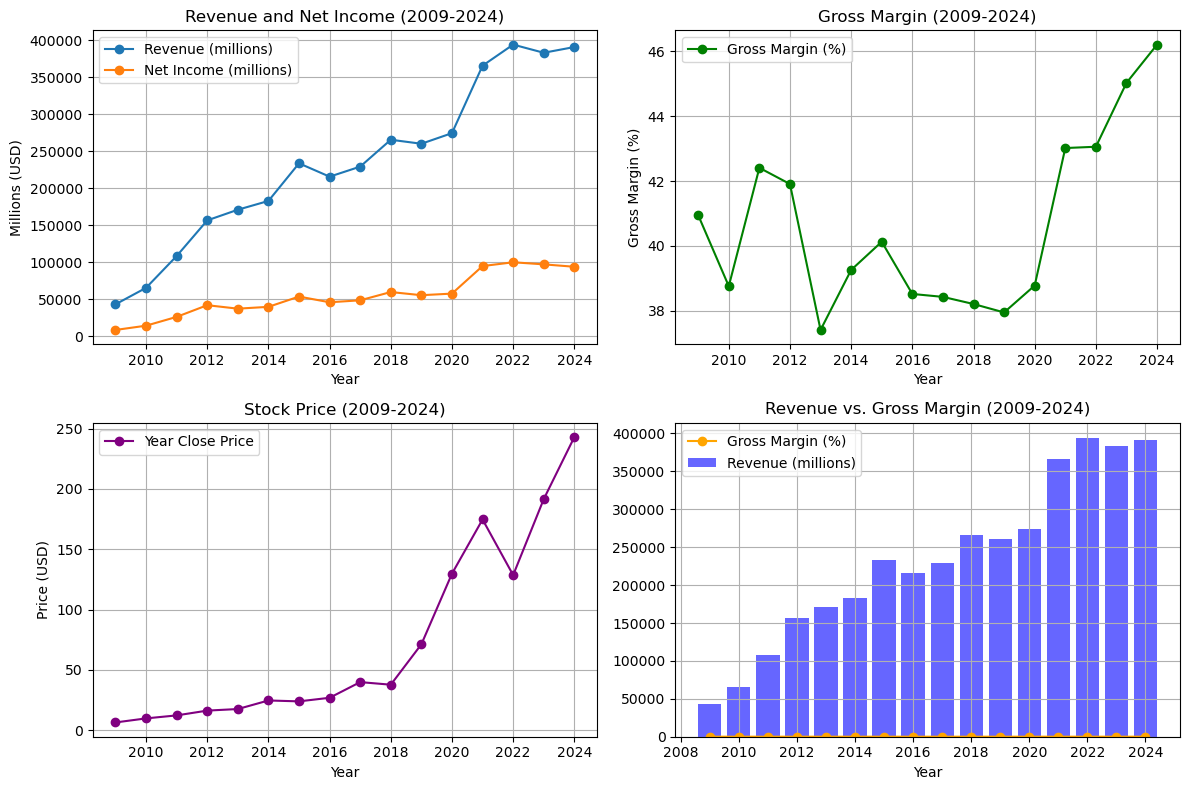

In [12]:
plt.figure(figsize=(12, 8))
# Revenue and Net Income Trends
plt.subplot(2, 2, 1)
plt.plot(apple_data['year'], apple_data['Revenue (millions)'], label='Revenue (millions)', marker='o')
plt.plot(apple_data['year'], apple_data['Net Income (millions)'], label='Net Income (millions)', marker='o')
plt.title('Revenue and Net Income (2009-2024)')
plt.xlabel('Year')
plt.ylabel('Millions (USD)')
plt.legend()
plt.grid(True)

# Gross Margin Trends
plt.subplot(2, 2, 2)
plt.plot(apple_data['year'], apple_data['Gross Margin'], label='Gross Margin (%)', color='green', marker='o')
plt.title('Gross Margin (2009-2024)')
plt.xlabel('Year')
plt.ylabel('Gross Margin (%)')
plt.legend()
plt.grid(True)

# Stock Price Trends
plt.subplot(2, 2, 3)
plt.plot(apple_data['year'], apple_data['Year Close Price'], label='Year Close Price', color='purple', marker='o')
plt.title('Stock Price (2009-2024)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Revenue vs. Gross Margin Comparison
plt.subplot(2, 2, 4)
plt.bar(apple_data['year'], apple_data['Revenue (millions)'], alpha=0.6, label='Revenue (millions)', color='blue')
plt.plot(apple_data['year'], apple_data['Gross Margin'], label='Gross Margin (%)', color='orange', marker='o')
plt.title('Revenue vs. Gross Margin (2009-2024)')
plt.xlabel('Year')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

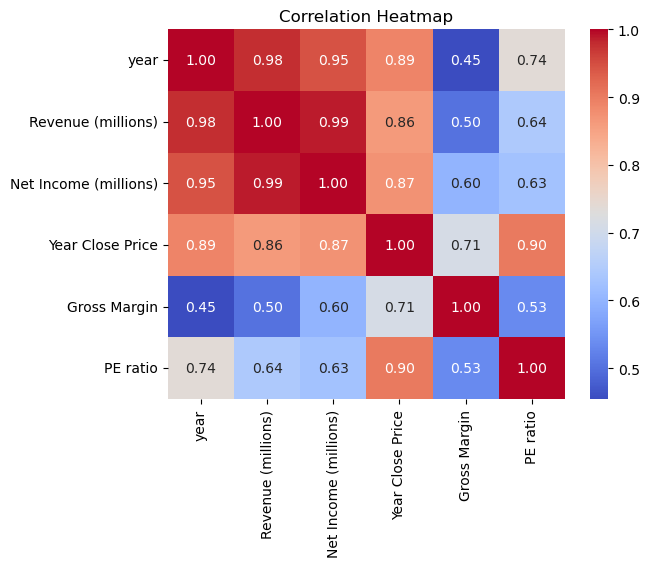

In [13]:
# Select only numeric columns
numeric_df = apple_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

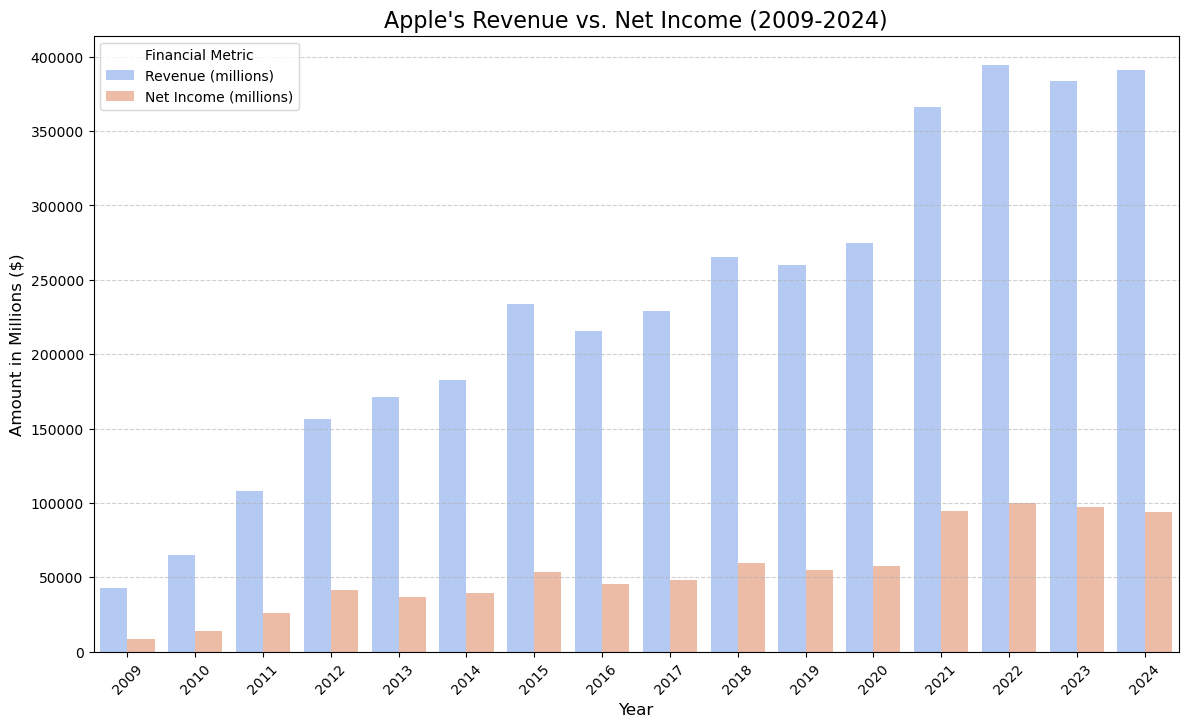

In [14]:
plt.figure(figsize=(14, 8))

# Plot bars for Revenue and Net Income
sns.barplot(data=apple_data.melt(id_vars='year', value_vars=['Revenue (millions)', 'Net Income (millions)']),
            x='year', y='value', hue='variable', palette='coolwarm')

# Customize the plot
plt.title("Apple's Revenue vs. Net Income (2009-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount in Millions ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Financial Metric')
plt.show()

### Observations 

##### This analysis examines Apple’s financial metrics during a transformative period, highlighting the company’s journey from a tech leader to a global superpower. Key insights are drawn from trends in revenue, profit, gross margin, stock performance, and financial stability.

1. Revenue and Net Income Growth:
* Steady increase in revenue and net income, especially during innovation-heavy years like 2009–2014.
* Revenue shows significant growth post-2010, reflecting the success of major product launches (e.g., iPhone and iPad).
* Apple’s revenue and net income show remarkable growth from 2009 to 2024, with significant surges during innovation-heavy years (e.g., 2009–2014)
  - 2009: ~$42 billion.
  - 2014: ~$182 billion (4.3x growth in 5 years).
  - 2024: ~$391 billion (2.1x growth compared to 2014).
* Net Income follows a similar trend, reflecting efficient scaling and operational management.

2. Gross Margin Stability:
* Gross margin fluctuates but remains above 35%, indicating efficient cost management and profitability even during scaling.
* Margins peaked near 45% during certain years but showed minor dips post-2020 as the company prioritized scaling over per-unit profitability.

3. Stock Price Correlation:
* Apple's stock price aligns closely with revenue and net income trends, reflecting market confidence during innovation peaks and overall financial health.
* Significant jumps in stock price occurred during years of flagship product releases (e.g., iPhone and iPad introductions).
* 2024 Stock Close Price: $243.04.

4. Revenue vs. Gross Margin:
* Revenue growth accelerates, but gross margins slightly dip in some years, suggesting a focus on scaling product availability over maximizing unit profitability.

5. Employee Growth
* Workforce expanded from 34,000 in 2009 to ~164,000 in 2024, underscoring the company’s global scaling and operational growth.